In [6]:
print(X.shape)

(1000, 1)


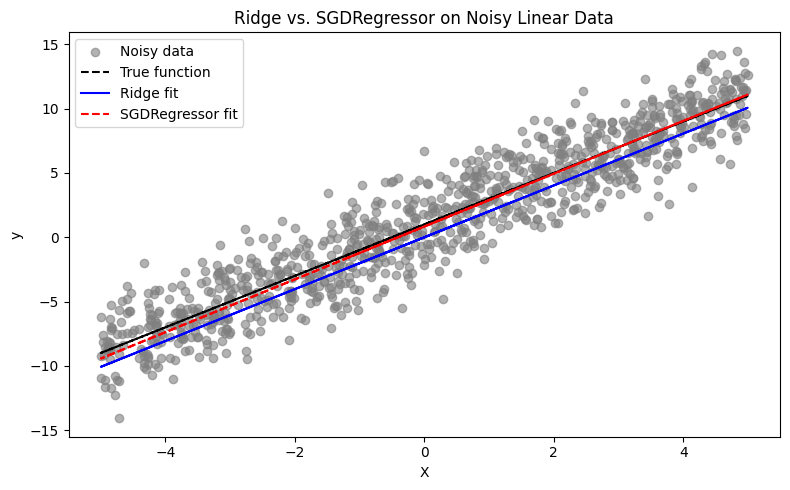

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, SGDRegressor

# --- Generate simple 1D noisy data ---
rng = np.random.default_rng(0)
X = rng.uniform(-5, 5, 1000).reshape(-1, 1)
y_true = 2.0 * X.squeeze() + 1.0
y = y_true + rng.normal(scale=2.0, size=X.shape[0])

# --- Fit Ridge (exact) ---
ridge = Ridge(alpha=0.1, fit_intercept=False)
ridge.fit(X, y)
y_ridge = ridge.predict(X)

# --- Fit SGDRegressor (approximate ridge) ---
sgd = SGDRegressor(penalty="l2", alpha=0.1, max_iter=1000, tol=1e-10, random_state=0)
for x_i, y_i in zip(X, y):
    sgd.partial_fit([x_i], [y_i])
y_sgd = sgd.predict(X)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Noisy data")
plt.plot(X, y_true, color="black", linestyle="--", label="True function")
plt.plot(X, y_ridge, color="blue", label="Ridge fit")
plt.plot(X, y_sgd, color="red", linestyle="--", label="SGDRegressor fit")
plt.title("Ridge vs. SGDRegressor on Noisy Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

# Synthetic data
np.random.seed(42)
X = np.random.randn(1000, 50)

# Standard PCA
pca = PCA(n_components=5)
pca.fit(X)

# Incremental PCA with many small batches
ipca = IncrementalPCA(n_components=5)
batch_size = 5
for i in range(0, X.shape[0], batch_size):
    ipca.partial_fit(X[i:i+batch_size])

# Compare explained variance
print("Explained variance ratio (PCA):  ", np.round(pca.explained_variance_ratio_, 6))
print("Explained variance ratio (IPCA): ", np.round(ipca.explained_variance_ratio_, 6))

# Compare components
diff = np.abs(pca.components_ - ipca.components_).max()
print(f"\nMaximum absolute difference between components: {diff:.2e}")

# Compare reconstruction error
X_pca = pca.inverse_transform(pca.transform(X))
X_ipca = ipca.inverse_transform(ipca.transform(X))
reconstruction_diff = np.mean((X_pca - X_ipca)**2)
print(f"Mean squared reconstruction difference: {reconstruction_diff:.2e}")



Explained variance ratio (PCA):   [0.02969  0.028286 0.027658 0.027259 0.026527]
Explained variance ratio (IPCA):  [0.025853 0.024345 0.023182 0.022021 0.021579]

Maximum absolute difference between components: 5.50e-01
Mean squared reconstruction difference: 1.79e-01
